In [12]:
""" Kora S. Hughes - Machine Learning Final Project - Fall 2022 """

' Kora S. Hughes - Machine Learning Final Project - Fall 2022 '

In [52]:
# General
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

In [14]:
# MediaPipe SetUp --> https://google.github.io/mediapipe/getting_started/python.html
"""
python3 -m venv mp_env && source mp_env/bin/activate
pip install mediapipe
python3
"""
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

In [15]:
# MediaPipe Implementation --> https://google.github.io/mediapipe/solutions/hands
import cv2
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# mediapipe for static images:
def run_mediapipe(IMAGE_FILES, max_hands=1, conf=0.5):
    with mp_hands.Hands(static_image_mode=True, max_num_hands=max_hands, min_detection_confidence=conf) as hands:
        all_results = []
        for idx, file in enumerate(IMAGE_FILES):
            # Read an image, flip it around y-axis for correct handedness output (see above).
            image = cv2.imread(file)  # cv2.flip(cv2.imread(file), 1) not needed since it is already flipped when taken by my method
            # Convert the BGR image to RGB before processing.
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            # Draw hand world landmarks.
            if not results.multi_hand_world_landmarks:
                continue
            for hand_world_landmarks in results.multi_hand_world_landmarks:
                mp_drawing.plot_landmarks(hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)
            
            # Print handedness and draw hand landmarks on the image.
#             print('Handedness:', results.multi_handedness)
            if not results.multi_hand_landmarks:
                continue

            # print landmarks
            image_height, image_width, _ = image.shape
            annotated_image = image.copy()
#             for hand_landmarks in results.multi_hand_landmarks:  # normalized
#                 print('hand_landmarks:', hand_landmarks)
#                 print(f'Index finger tip coordinates: (',
#                   f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
#                   f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})')
#                 mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                           mp_drawing_styles.get_default_hand_landmarks_style(),
#                                           mp_drawing_styles.get_default_hand_connections_style())
#             cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
            # save results
            all_results.append(results)
        return all_results

In [16]:
# structure functions
classes = {"A":0, "B":1, "K":2, "H":3, "Y":4, "W":5}
total_options = len(classes)
print("Options:", total_options, "=>", classes)
num_features = 21*3  # 21 landmarks, each with an xyz coord + encoded y
def encode_y(y):
    y_vect = np.zeros((1, total_options-1))
    if classes[y] != 0:  # Note: first value is defined by all values = 0
        y_vect[0, (classes[y]-1)] = 1
    return y_vect

Options: 6 => {'A': 0, 'B': 1, 'K': 2, 'H': 3, 'Y': 4, 'W': 5}


In [17]:
image_dir = "/test-images/"  # "/prelim-test-images/"

# get images
cwd = os.getcwd()  # current dir
saved_results = cwd + "/processed"  # for later

# list of images via dir string
print("Finding Files...\n")
images = [cwd+image_dir+file for file in os.listdir(cwd+image_dir) if ".png" in file]
assert len(images) >= 1
print("Found", len(images), "files...")

Finding Files...

Found 399 files...


Calculating Landmarks...

Image is category K which is mapped to 2 = [[0. 1. 0. 0. 0.]]


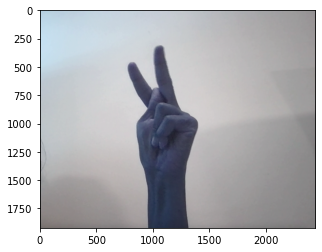

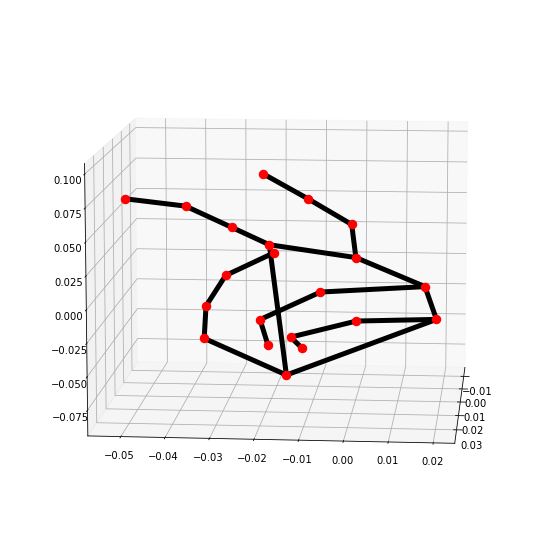




Image is category H which is mapped to 3 = [[0. 0. 1. 0. 0.]]


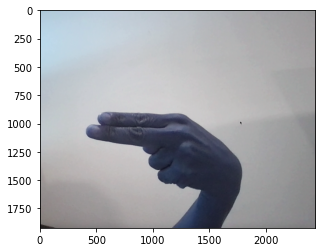

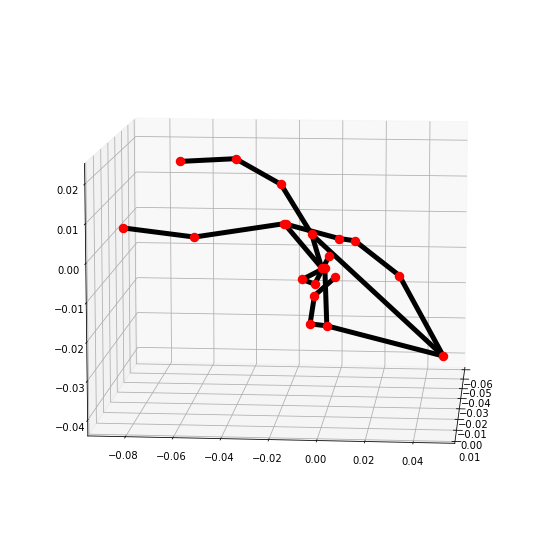




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


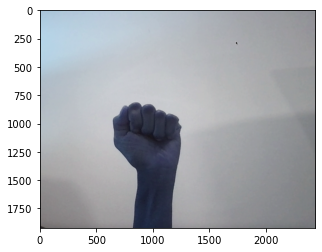

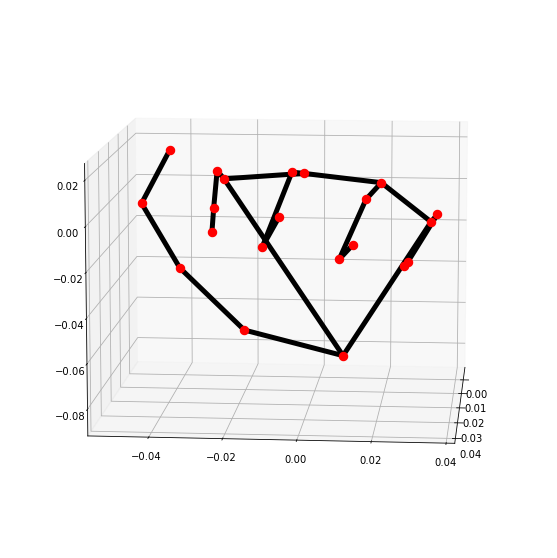




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


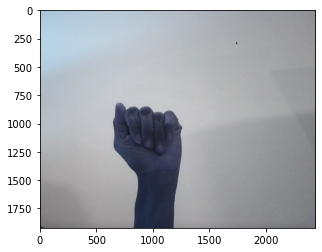

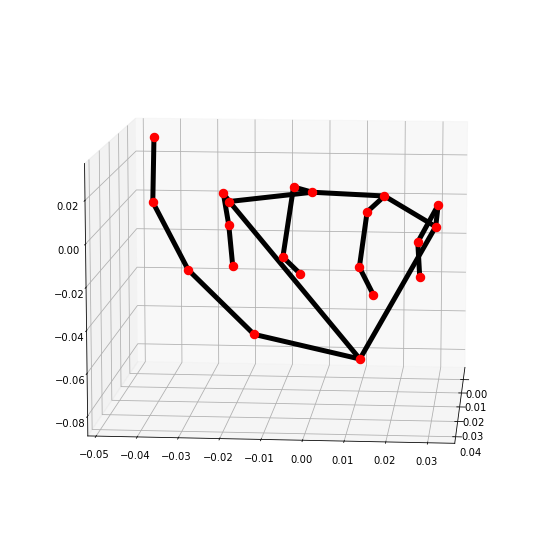




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


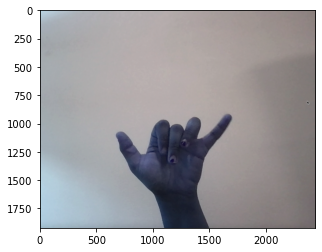

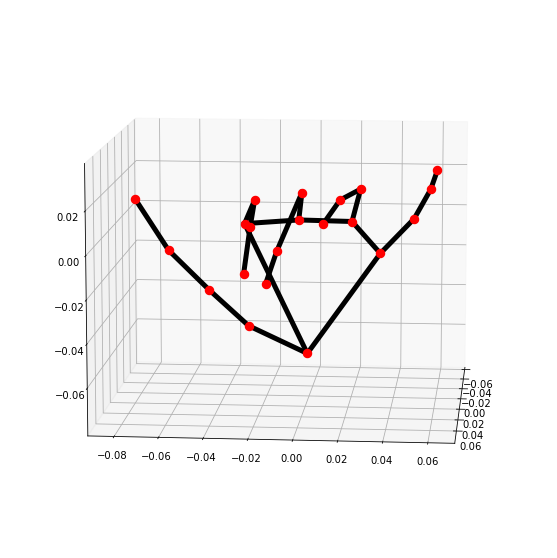




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


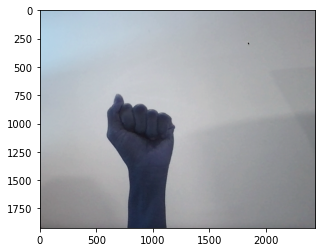

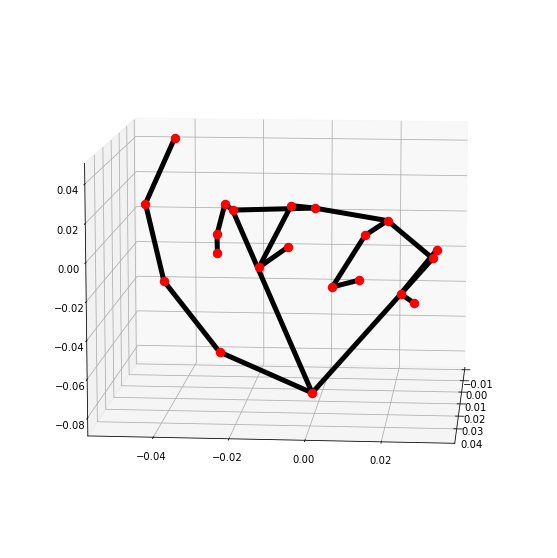




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


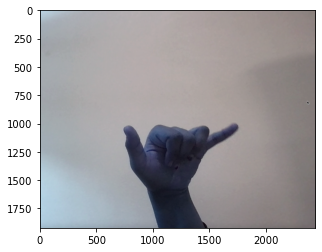

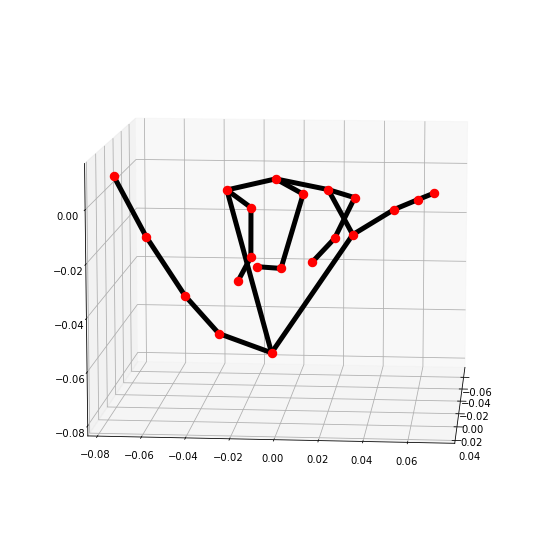




Image is category H which is mapped to 3 = [[0. 0. 1. 0. 0.]]


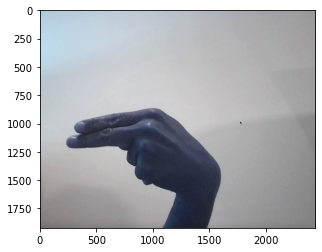

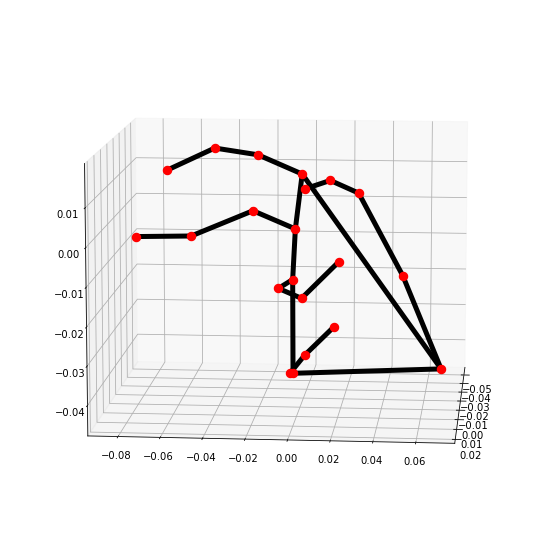




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


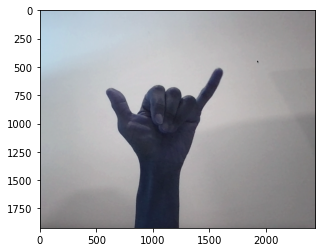

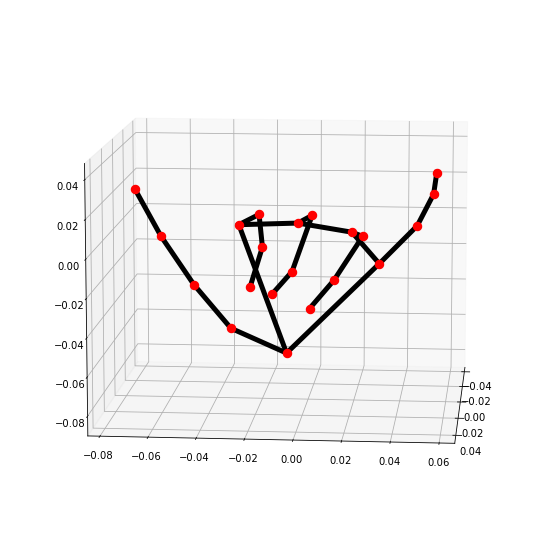




Image is category W which is mapped to 5 = [[0. 0. 0. 0. 1.]]


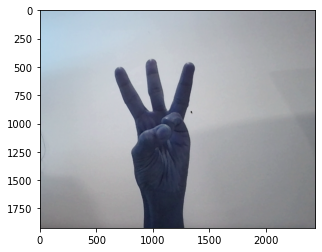

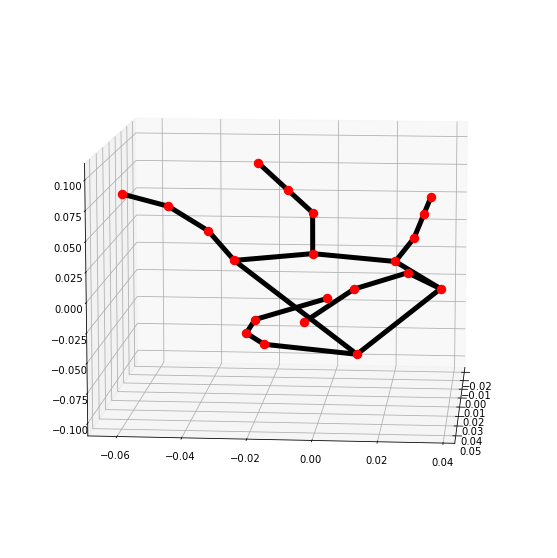




Image is category W which is mapped to 5 = [[0. 0. 0. 0. 1.]]


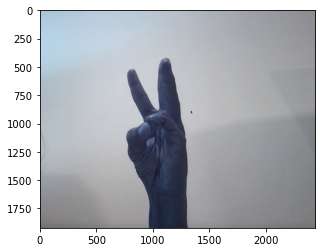

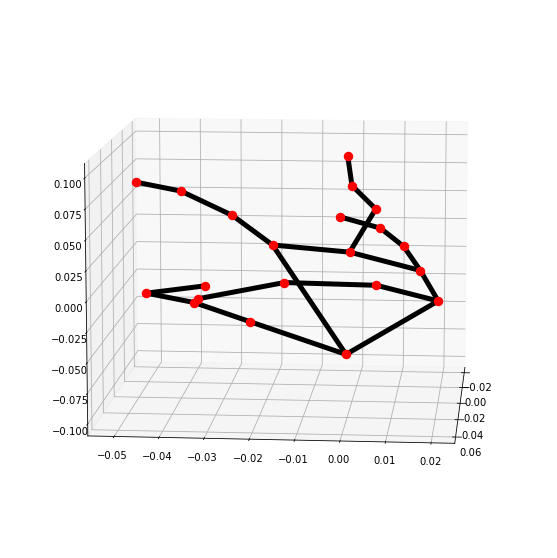




Image is category H which is mapped to 3 = [[0. 0. 1. 0. 0.]]


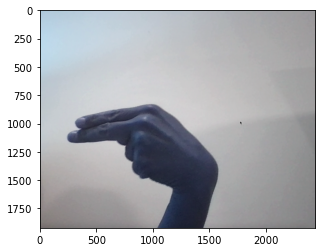

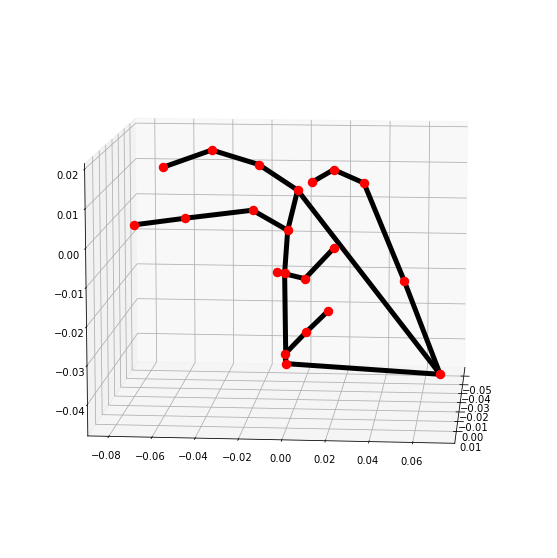




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


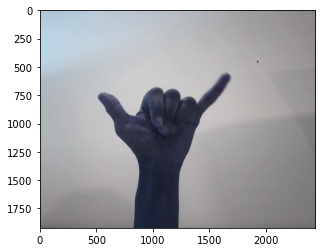

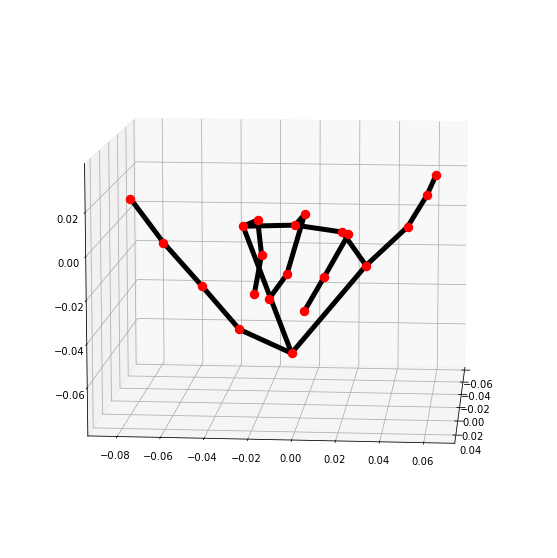




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


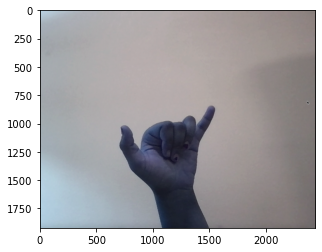

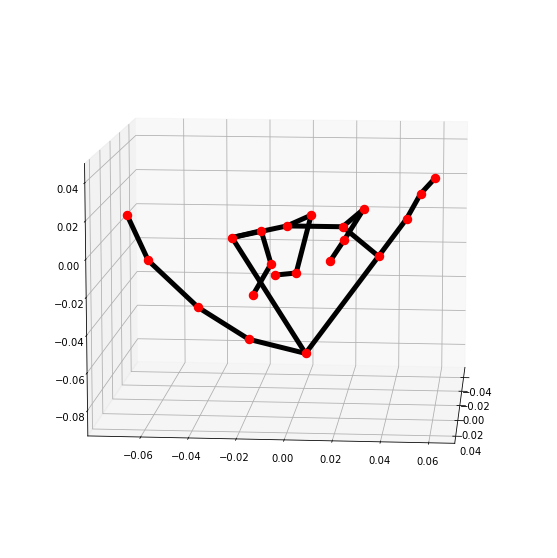




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


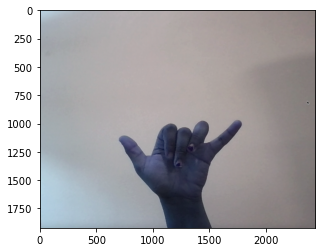

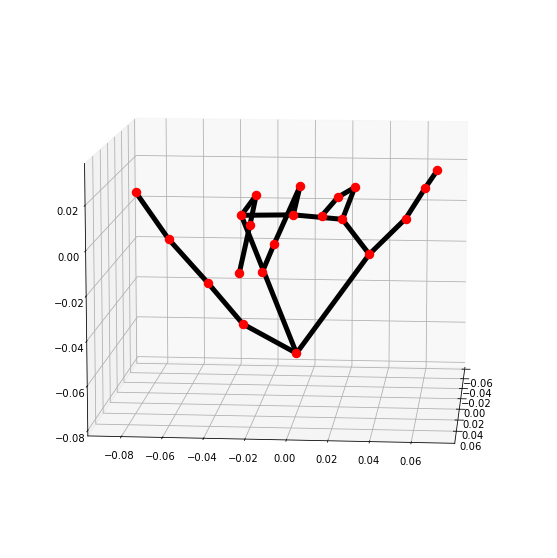




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


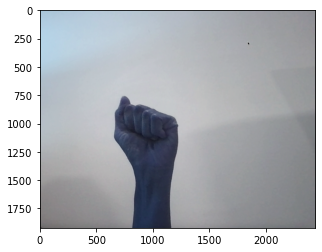

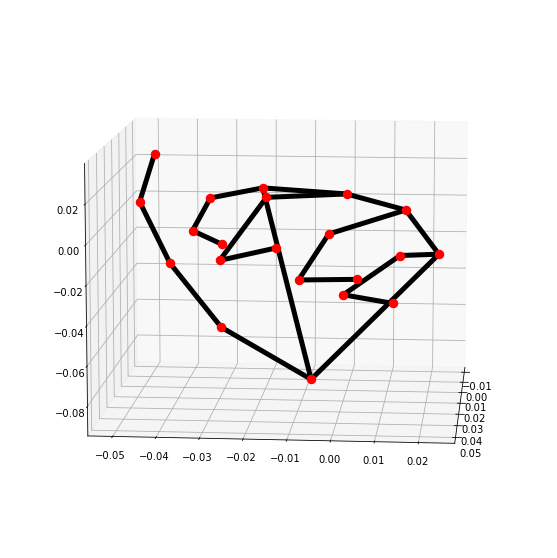




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


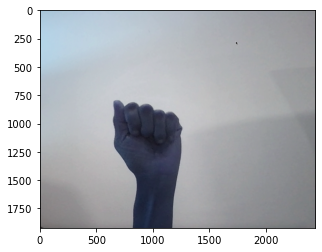

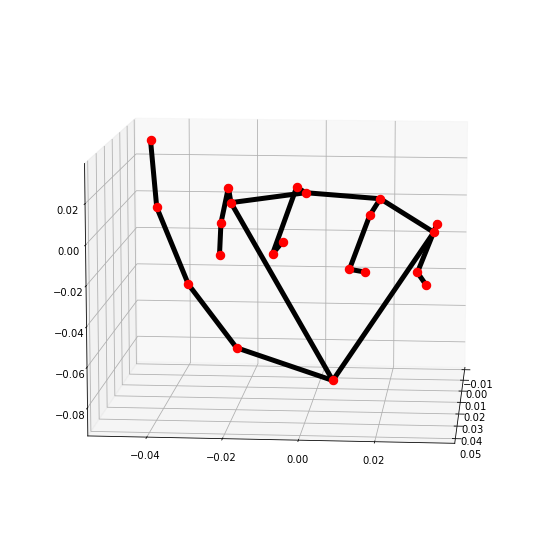




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


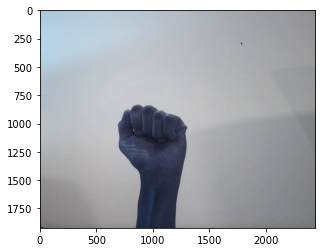

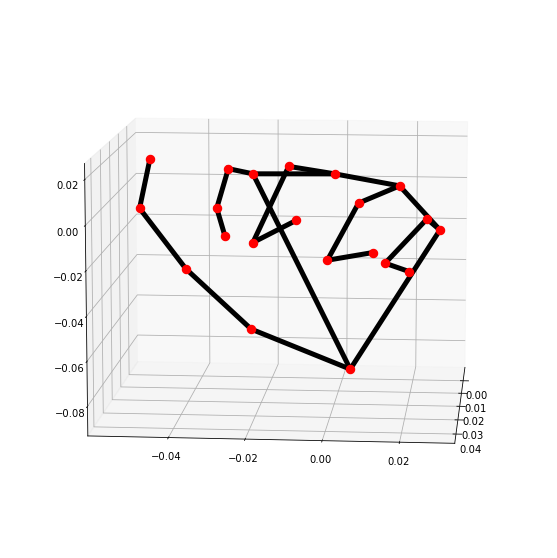




Image is category H which is mapped to 3 = [[0. 0. 1. 0. 0.]]


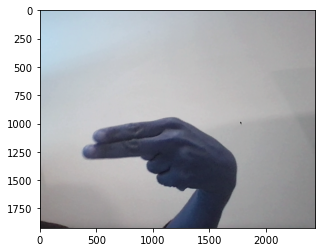

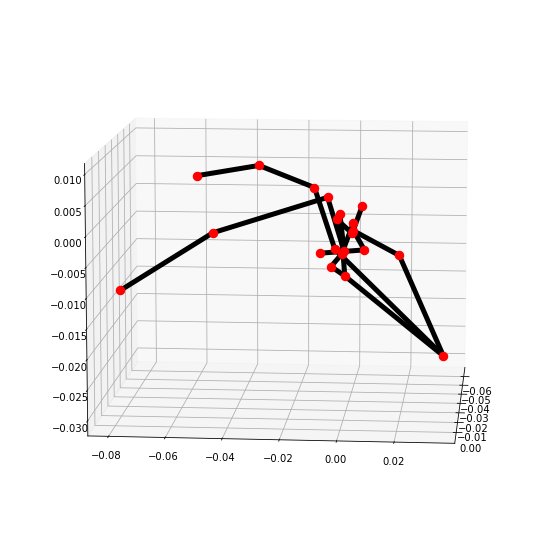




Image is category K which is mapped to 2 = [[0. 1. 0. 0. 0.]]


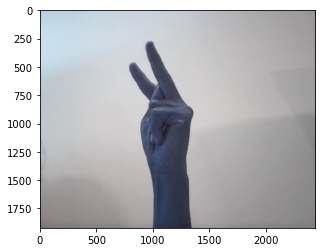

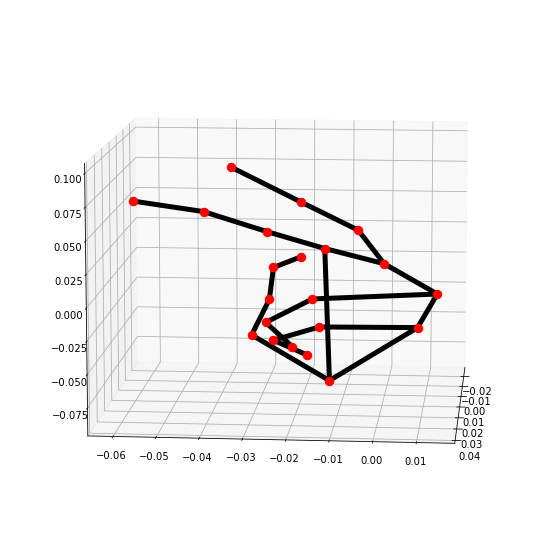




Image is category K which is mapped to 2 = [[0. 1. 0. 0. 0.]]


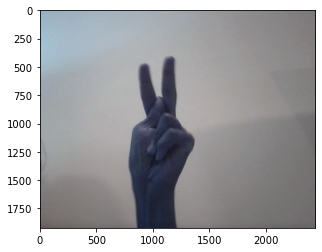

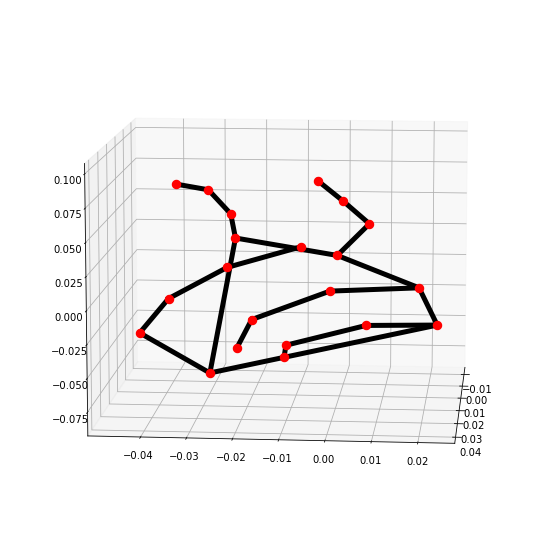




Image is category H which is mapped to 3 = [[0. 0. 1. 0. 0.]]


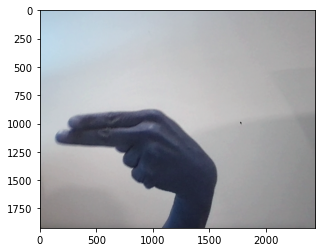

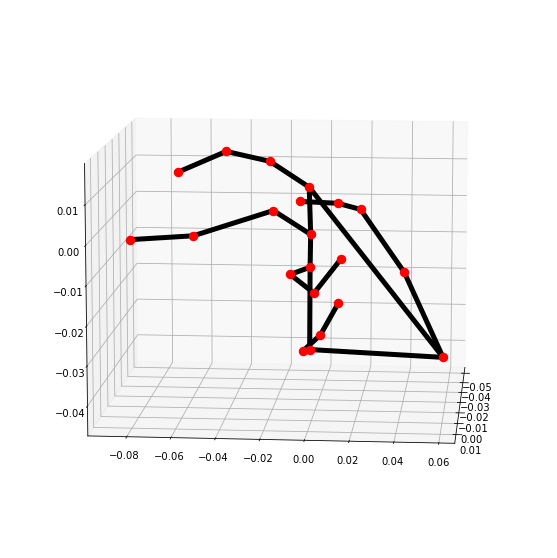




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


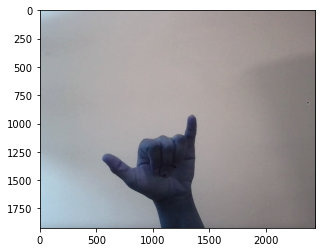

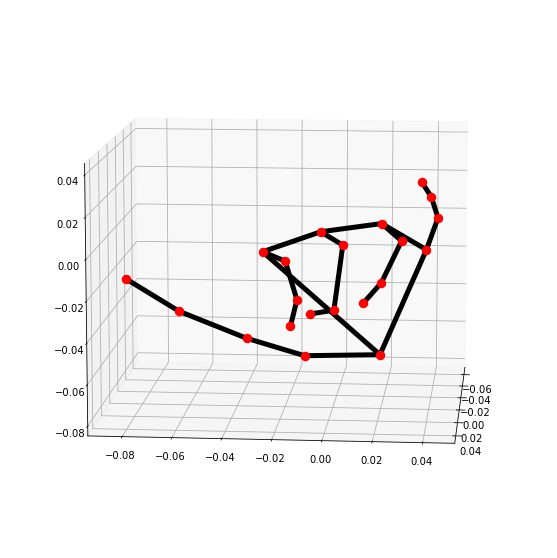




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


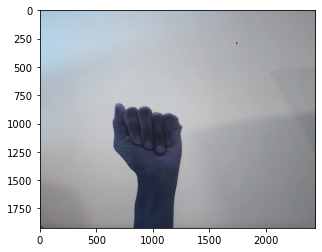

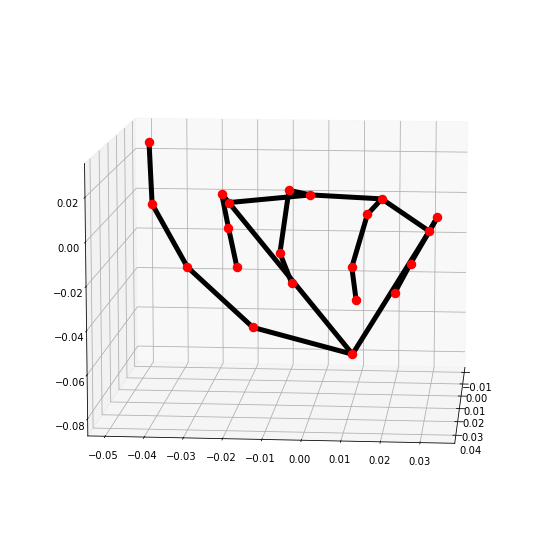




Image is category A which is mapped to 0 = [[0. 0. 0. 0. 0.]]


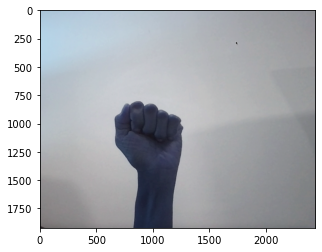

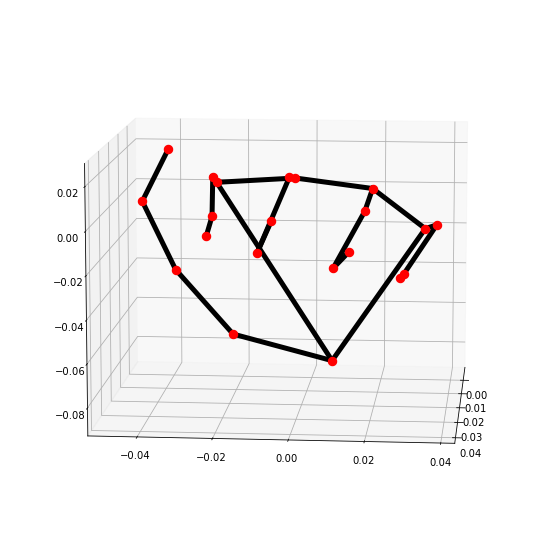




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


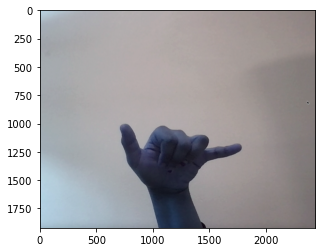

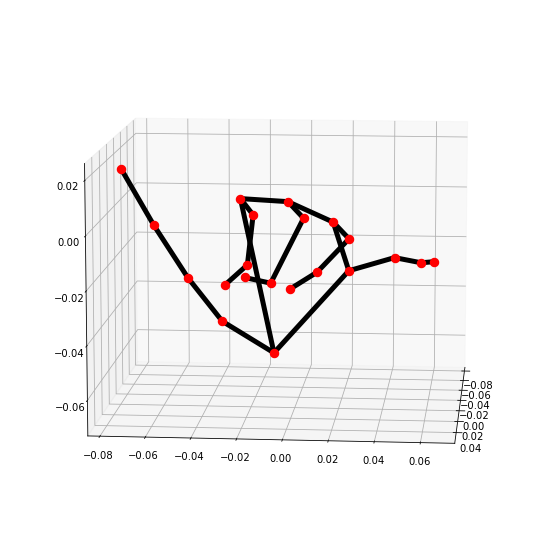




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


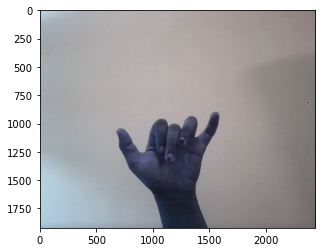

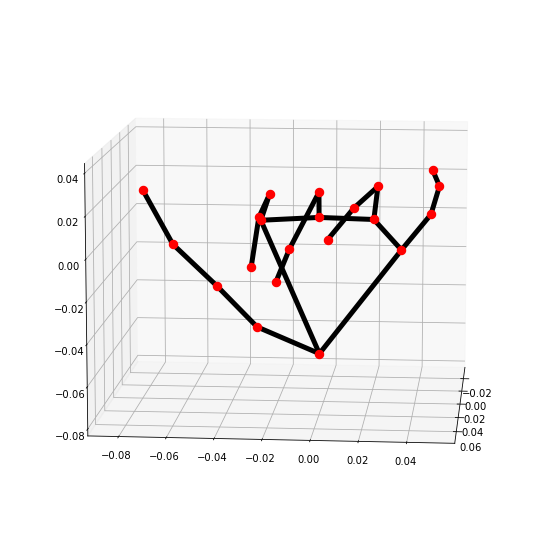




Image is category Y which is mapped to 4 = [[0. 0. 0. 1. 0.]]


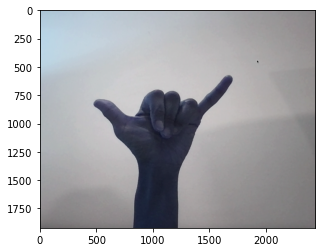

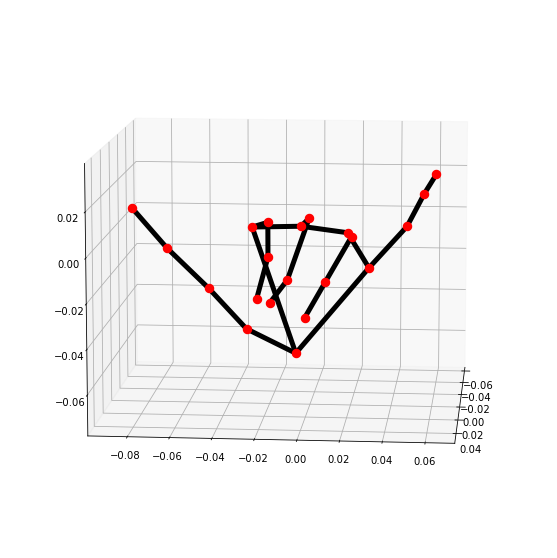




Image is category W which is mapped to 5 = [[0. 0. 0. 0. 1.]]


KeyboardInterrupt: 

In [278]:
# calculate landmarks and develop feature matrix from images
print("Calculating Landmarks...\n")

results = np.ones((1, num_features+total_options-1))
for img in images:
    # add target variable (ex: a vs. b = ) --> formatting from data_gatherer file
    # in image address: find the last instance of / and use the character after as the determinant for which letter it is
    letter = str(img[img.rfind('/')+1])
    if letter in classes.keys():
        add_y = encode_y(letter)  # one-hot encode
        print("Image is category", letter, "which is mapped to", classes[letter], "=", add_y)

        plt.imshow(cv2.imread(img))  # show actual image
        plt.show()

        ret = run_mediapipe([img], 1)[0].multi_hand_landmarks[0]  # get hand skeleton data
    #     print("Return:", ret.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP])

        # translate landmark values to feature matrix format
        assert len(ret.landmark)*3 == num_features   # just checking my analysis of features is correct so we dont miss any data
#         print("Landmark:\n", ret.landmark)
        add_row = np.ones((1, num_features))
        for j in range(0, num_features):
            if j%3 == 0:
                add_row[0, j] = ret.landmark[j//3].x
            elif j%3 == 1:
                add_row[0, j] = ret.landmark[j//3].y
            else:
                add_row[0, j] = ret.landmark[j//3].z
        
        add_row = np.hstack((add_row, add_y))
#         print("Adding row:\n", add_row)
        results = np.vstack((results, add_row))  # append results
#         print("Example Landmark Extraction:\n", add_row)
        print('\n\n')
    else:
        print("Skipping letter", letter, "from", img[-20:], "because we are not testing on it right now...\n")
        assert False

# clean results
dataset = np.delete(results, (0), axis=0)  # delete the initial row of ones
print(dataset)
# y = temp[:, -1].reshape(-1,1)  # target
# X = temp[:, :-1]  # take out target from feature matrix
# print("Feature Matrix X", X.shape, ':\n', X)
# print("y:\n", y)
# print()

np.save(saved_results, dataset)
print("saved in", saved_results)

In [51]:
# restore
dataset = np.load((saved_results+".npy"))
print(dataset)
# np.savetxt("saved-data.csv", dataset, delimiter=",")

[[ 4.37471390e-01  7.29823768e-01  5.01457436e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.68098211e-01  7.22497225e-01  5.96529333e-07 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.25750256e-01  7.25648165e-01 -9.16380202e-07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 7.41594434e-01  7.55392432e-01  3.28332334e-07 ...  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.85340035e-01  6.93048358e-01  3.52689767e-07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.49972153e-01  7.72432804e-01  5.22774940e-07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [71]:
# Sectioning off data for phases
phase_num = 5 # phase 1 = binary, phase 2 = [A,B,K], ..., phase 5
one_hot = False

if phase_num+1 == total_options:
    new_results = dataset
else:
    unwanted_y = dataset[:, phase_num+1-total_options:]
    new_results = dataset[np.where(np.sum(unwanted_y, axis=1)==0)]
print("Found", str(len(new_results))+"/"+str(len(dataset)), "instances of phase", phase_num)
# print(dataset[:, 1-total_options:])
# print(dataset[:, 1-total_options:phase_num+1-total_options])

if not one_hot:  # decode the 1-hot encoding for different training cases
    temp_keys = [k for k in classes.keys()]
    temp = np.zeros(len(new_results))
    for i in range(len(new_results)):
        if phase_num+1 == total_options:
            y_encode = new_results[i, 1-total_options:]
        else:
            y_encode = new_results[i, 1-total_options:phase_num+1-total_options]
        ind = np.argwhere(y_encode == 1)
        if len(ind) == 0:
            temp[i] = classes["A"]
        else:
            temp[i] = ind[0,0]+1
        
#     new_results = np.delete(new_results, np.s_[1-total_options:phase_num+1-total_options], axis=1)
#     new_results = np.hstack(new_results, temp)
    y = temp.reshape(-1, 1)
    X = new_results[:, :1-total_options]
else:
    y = new_results[:, 1-total_options:phase_num+1-total_options]  # target
    X = new_results[:, :1-total_options]  # take out target from feature matrix
print("\nFeature Matrix X", X.shape, ':\n', X)
print("y:\n", y)

# preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2
print("\n{ Train | Validation | Test =>", len(X_train), len(X_val), len(X_test), "}")

Found 399/399 instances of phase 5

Feature Matrix X (399, 63) :
 [[ 4.37471390e-01  7.29823768e-01  5.01457436e-08 ...  4.34596747e-01
   6.17286086e-01 -6.16068318e-02]
 [ 6.68098211e-01  7.22497225e-01  5.96529333e-07 ...  5.09466767e-01
   7.47484148e-01 -8.05493593e-02]
 [ 4.25750256e-01  7.25648165e-01 -9.16380202e-07 ...  4.63227689e-01
   5.80236793e-01 -1.69376621e-03]
 ...
 [ 7.41594434e-01  7.55392432e-01  3.28332334e-07 ...  5.81752241e-01
   7.35923290e-01 -4.90799285e-02]
 [ 3.85340035e-01  6.93048358e-01  3.52689767e-07 ...  4.57956433e-01
   3.29312146e-01 -3.38607803e-02]
 [ 4.49972153e-01  7.72432804e-01  5.22774940e-07 ...  4.82101381e-01
   6.54196739e-01 -2.81903055e-02]]
y:
 [[2.]
 [3.]
 [0.]
 [0.]
 [4.]
 [0.]
 [4.]
 [3.]
 [4.]
 [5.]
 [5.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [0.]
 [0.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [4.]
 [4.]
 [4.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]
 [5.]
 [3.]
 [4.]
 [4.]
 [0.]
 [0.]
 [4.]


# HOMEBREW TRAINING:

In [56]:
# Logistic Regression Implementation:
multiclass = True if phase_num > 1 else False

def sigmoid(z):
    result = 1/(1+np.exp(-z))
    return result

def hypothesis(X_train_1, w):
    y_hat = sigmoid(np.dot(X_train_1, w))
    return y_hat


def add_ridge(w, l=0.05, lasso=False):
    if lasso:
        return np.sum(np.absolute(w))*l
    return np.sum(np.square(w))*l

def likelihood(X_tr, y_tr, w, n, r=False):
    y_hat = hypothesis(X_tr, w)
    t1 = np.dot(y_tr.T, np.log(y_hat))
    t2 = np.dot((1-y_tr.T), np.log(1-y_hat))
    likelihood = np.sum(t1 + t2)
    if r:
        likelihood = likelihood - add_ridge(w, 0.05)
    return likelihood


data_div = 20 # num data pts skipped in between plotting pts
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    N = len(X_train_1) # Number of training examples.
    likelihood_values = []
    w = np.zeros((X_train_1.shape[1],1))
    
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1, w)
        error = y_2d_train - y_hat
        gradient = np.dot(X_train_1.T, error)  # - add_ridge(w, lambd2)
        w = w + (learning_rate/N)*gradient  # Updating Parameters
        if (i % data_div) == 0:
#             print("added ridge of", add_ridge(w, lambd2))
#             print("new w mean", np.mean(w))
            likelihood_values.append(likelihood(X_train_1,y_2d_train, w*1, N))
    return w, likelihood_values

# train weights for feature matrix
num_iters = 3000
learning_rate = 0.05
"""
w, likelihood_values = Gradient_Ascent(X_train, y_train, learning_rate, num_iters)  # my implementation
# print("W_final:", w)

print("\nTraining Results for", str(phase_num+1), "classes,", len(X_train), " examples, and", learning_rate, "alpha:")
iters = np.array(range(0,num_iters,data_div))
plt.plot(iters,likelihood_values,'.-',color='purple')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()
plt.show(block=False)
"""

# eval

# make_multiclass = np.vectorize(lambda )
make_binary = np.vectorize(lambda x, t: 1 if x > t else 0)  # helper
def precision_recall(y_hat, y, threshold, binarized=False):  
    # Before finding precision or recall, you have to convert y_hat into a vector of zeros and ones named y_hat_binary using threshold.
    # Values in y_hat > threshold should be equal to 1 and others should be 0.
    y_hat = np.copy(y_hat)
    # Convert values in y_hat_binary to binary values below
    if binarized:
        y_hat_binary = y_hat
    else:
        y_hat_binary = make_binary(y_hat, threshold)

    # Calculate false positive and false negative using false difference
    # HINT: false different can be calculated by subtracting hypothesis from actual value
    # HINT: if done correctly, false_pos should be 4 and false_neg should be 2
    false_difference = y_hat - y
    false_pos = np.sum(np.logical_and(y_hat_binary == 1, y == 0))
    false_neg = np.sum(np.logical_and(y_hat_binary == 0, y == 1))

    all_trues = np.ones((y.shape[0], 1)) 
    # Calculate true positive using all_trues and true difference
    # HINT: true different can be calculated by subtracting sum of hypothesis and actual value from all trues
    # HINT: if done correctly, true_pos should be 266
    true_difference = np.sum(y_hat_binary) - np.sum(y)
    true_pos = np.sum(np.multiply(y_hat_binary, y))  # only = 1 if both y_hat and y are 1
    true_neg = np.sum(np.logical_and(y_hat_binary == 0, y == 0))

    if binarized:
        is_eq = np.vectorize(lambda a,b: 1 if a==b else 0)
        is_not_eq = np.vectorize(lambda a,b: 0 if a==b else 1)
        true_pos = np.sum(is_eq(y_hat_binary, y))
        true_neg = np.sum(is_eq(y_hat_binary, y))
        false_pos = np.sum(is_not_eq(y_hat_binary, y))
        false_neg = np.sum(is_not_eq(y_hat_binary, y))
#         print(false_difference)
    print("[TP, TN, FP, FN] =", [true_pos, true_neg, false_pos, false_neg])
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    return precision, recall

def f_score(precision, recall):
    score = (2*precision*recall)/(precision+recall)
    return score

def predict(X_train_1, w):
    y_hat = hypothesis(X_train_1, w)
    return y_hat

is_lib = True
print()
validations = {"Training":[X_train, y_train], "Validating":[X_val,y_val], "Testing": [X_test,y_test]}
for key, value in validations.items():
    print(key, "set with", len(value[0]), "items...")
    if is_lib:
        y_hat = lm.predict(value[0])
        precision, recall = precision_recall(y_hat, value[1], 0.5, True)
    else:
        y_hat = predict(value[0], w)  # predict(X_train, w)
        precision, recall = precision_recall(y_hat, value[1], 0.5)
    
    print('Precision: ', precision)
    print('Recall: ', recall)
    fsc = f_score(precision, recall)
    print("F1:", fsc)
    print()
# TODO: find the top 10 most significant measurements according to the weights and translate them to the mp_hands.HandLandmark


Training set with 239 items...
[TP, TN, FP, FN] = [9615, 9615, 47506, 47506]
Precision:  0.16832688503352533
Recall:  0.16832688503352533
F1: 0.16832688503352533

Validating set with 80 items...
[TP, TN, FP, FN] = [1110, 1110, 5290, 5290]
Precision:  0.1734375
Recall:  0.1734375
F1: 0.1734375

Testing set with 80 items...
[TP, TN, FP, FN] = [1140, 1140, 5260, 5260]
Precision:  0.178125
Recall:  0.178125
F1: 0.178125



In [57]:
# SVM Implementation
def one_vs_rest_encoding(y, digit = '0'):

    # Let y_encoded be an numpy array of encoded digits, with 1 for the digit we want to predict, and -1 for the rest
    # This may take several lines of code, but please store your final encoding in y_encoded
    onevrest = np.vectorize(lambda x: 1 if x == digit else -1)
    return  onevrest(y)

curr_class = [value for key, value in classes.items() if value <= phase_num]   # {"A":0, "B":1, "K":2, "H":3, "Y":4, "W":5}
y_train_vs_rest = [one_vs_rest_encoding(y_train, num) for num in curr_class]
y_val_vs_rest =  [one_vs_rest_encoding(y_val, num) for num in curr_class]
# print("Vs Rest Training:", y_train_vs_rest)


def score(X, w):
    # To do
    return np.dot(X, w)

def svm_objective(w, X, y, lambda1=.1):
    # To do. This part may require several lines of code. 
    # Store your answer in result.
    result = (lambda1/2)*np.sum(np.square(w)) + np.sum(np.maximum(0, (1 - np.multiply(y, np.dot(X, w)))))
    return result


# stochastic sub-gradient descent
def pegasos(X_train, y_train, lambda1=0.08, num_iters = 3, threshold=1):
    # Hyperparameters: threshold, lambda1
    N = X_train.shape[0]
    d = X_train.shape[1]
    t = 0
    # Initial weight vector
    w = np.ones((d,))

    for iter in range(num_iters):
#         print('Iteration %d. J: %.6f' % (iter, svm_objective(w, X_train, y_train)))
        for i in range(N):
            t = t + 1
            # Complete the following code to find w. This will require several lines of code. 
            alpha = 1/(lambda1*t)
            if (y_train[i] * (X_train[i].dot(w)) >= threshold):
                w = w - alpha * (lambda1*w)
            else:
                w = w - alpha * ((lambda1*w) - y_train[i]*(X_train[i].T))
    return w


# Create the 10 classifiers
labels = "0123456789"
w_vals= {}
val_scores = {}
for i in range(len(labels)):
    # Note that each section may require more than one line of code.
    
    # Perform one-vs-rest for labels[i]
    # To do: Relabel the y labels in the train set to either 1 or -1 using one_vs_rest_encoding
    y_encoded = one_vs_rest_encoding(y_train, labels[i]) 
    # To do: Use the Pegasos algorithm on X_train and y_encoded to get the weight vector
    w_vals[i] = pegasos(X_train, y_encoded, 0.001, 3, 1) 
    
    # Estimate accuracy for one-vs-rest classifier for labels[i]
    # To do:  Relabel the y labels in the validation set to either 1 or -1 using one_vs_rest_encoding
    y_encoded_val = one_vs_rest_encoding(y_val, labels[i]) 
    # To do: Accuracy Estimation for one-vs-rest classifier for labels[i]
    y_hat = np.where(score(X_val, w_vals[i]) > 0, 1, -1)
    encode = np.vectorize(lambda a,b: 1 if a==b else 0)
    val_scores[i] = encode(y_encoded_val, y_hat)
encoded_vals = val_scores
val_scores = [np.sum(val_scores[i])/len(val_scores[i]) for i in range(len(val_scores))]

# To do: Predict the label for each example in the validation set 
# We will let eval be a numpy array of length N, where N is the number of examples in the validation set. 
# eval1 will hold either a 1 or a 0, depending if the handwritten digit was predicted correctly or not.
eval1 = np.zeros(len(X_val))

# To do: Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
# for val in val_score:
#     score = svm_objective(w, X_train, y_train)
for i in range(len(X_val)):
    scores = []
    for j in range(len(labels)):
        scores.append(np.dot(w_vals[j], X_val[i]))
    k = np.argmax(scores)
    if int(y_val[i]) == k:
        eval1[i] += 1

# eval

validations = {"Training":[X_train, y_train], "Validating":[X_val,y_val], "Testing": [X_test,y_test]}
for key, value in validations.items():
    print(key, "set with", len(value[0]), "items...")
    if is_lib:
        y_hat = [clf.predict([value[0][i]]) for i in range(len(value[0]))]
        precision, recall = precision_recall(y_hat, value[1], 0.5, True)
    else:
        y_hat = predict(value[0], w)  # predict(X_train, w)
        precision, recall = precision_recall(y_hat, value[1], 0.5)
    
    print('Precision: ', precision)
    print('Recall: ', recall)
    fsc = f_score(precision, recall)
    print("F1:", fsc)
    print()



Training set with 239 items...
[TP, TN, FP, FN] = [239, 239, 0, 0]
Precision:  1.0
Recall:  1.0
F1: 1.0

Validating set with 80 items...
[TP, TN, FP, FN] = [80, 80, 0, 0]
Precision:  1.0
Recall:  1.0
F1: 1.0

Testing set with 80 items...
[TP, TN, FP, FN] = [80, 80, 0, 0]
Precision:  1.0
Recall:  1.0
F1: 1.0



In [58]:
# Neural Network Implementation
from sklearn.metrics import accuracy_score

# Activations:
def f(z, alpha=0.25, activation='relu'):
    if activation == 'sigmoid':
        sigmoid = 1 / (1 + np.exp(-z))
    elif activation == 'relu':
        relu = np.vectorize(lambda x: max(0, x))(z)
    elif activation == 'tanh':
        tanh = np.vectorize(lambda x: ((np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))))(z)
    elif activation == 'elu':
        elu = np.vectorize(lambda x: max(alpha*np.exp(x), x))(z)
    else:
        print("activation function", activation, "count not be found...")
        assert False
#     print("sigmoid v. Reli v. Tanh v. Elu:", sigmoid, relu, tanh, elu)
    return np.vectorize(lambda x: max(0, x))(z)

def f_deriv(z, activation='relu'):
    if activation == 'sigmoid':
        sigmoid = f(z) * (1 - f(z))
    elif activation == 'relu':
        relu = np.vectorize(lambda x: 0 if x < 1 else 1)(z)
    elif activation == 'tanh':
        tanh = np.vectorize(lambda x: (1-f(x)*f(x)))(z)
    elif activation == 'elu':
        elu = np.vectorize(lambda x: (1 if f(x)==x else f(x)))(z)
    else:
        print("activation function", activation, "count not be found...")
        assert False
#     print("sigmoid v. Reli v. Tanh v. Elu:", sigmoid, relu, tanh, elu)
    return np.vectorize(lambda x: 0 if x < 1 else 1)(z)


# Setup Steps
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = np.random.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = np.random.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b


# Calculation Steps
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

# Computations:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)


def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25, regularized=0):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l])) + regularized*sum([np.sum(np.square(weight)) for weight in W.values()])/2
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))  # np.newaxis increase the number of dimensions
                    tri_W[l] += regularized*W[l]  # add regularized term
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
                    
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
            
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

# Neural Network Implementation
middle_layer = 5*3 + 3  # hand digits xyz + wrist orientation
nn_structure = [X_train.shape[1], int(middle_layer*2), phase_num+1]
"""
nn_structure = [X_train.shape[1], middle_layer, phase_num+1]
nn_structure2 = [X_train.shape[1], X_train.shape[1]//2, middle_layer, phase_num+1]
nn_structure3 = [X_train.shape[1], middle_layer, middle_layer//2, phase_num+1]
nn_structure4 = [X_train.shape[1], middle_layer//2, phase_num+1]
nn_structure5 = [X_train.shape[1], int(middle_layer*2), phase_num+1]
nn_structure6 = [X_train.shape[1], int(X_train.shape[1]//1.5), int(middle_layer*1.5), phase_num+1]
"""
print("Current NN Structure =", nn_structure)

# train the NN
n_iters = 2500
alpha = 0.25
add_reg = 0.006  # lambda for the regularization term

print()
print("WITH RELU")  # TODO: implement activation function as param so we can train with mutliple activations in 1 loop
print(nn_structure, "Neural Network: alpha =", alpha, ", regularized_lambda =", add_reg, "for", str(phase_num+1), "categories")
if phase_num > 1:  # one vs rest encoding
    phase_results = []
    predict_results = []
#     for category in range(phase_num+1):
    W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, n_iters, alpha, add_reg)
#     phase_results.append((W, b, avg_cost_func))
    y_pred = predict_y(W, b, X_test, len(nn_structure))
#     predict_results.append(y_pred)
else:
    W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train, n_iters, alpha, add_reg)
    plt.plot(avg_cost_func)
    plt.ylabel('Average J')
    plt.xlabel('Iteration number')
    plt.show()
    print("Last value =", avg_cost_func[-1])
    print()    
    y_pred = predict_y(W, b, X_test, len(nn_structure))
    
# Assessing accuracy
print('\nPrediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Current NN Structure = [63, 36, 6]

WITH RELU
[63, 36, 6] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories
Starting gradient descent for 2500 iterations
Iteration 0 of 2500
Iteration 100 of 2500
Iteration 200 of 2500
Iteration 300 of 2500
Iteration 400 of 2500
Iteration 500 of 2500
Iteration 600 of 2500
Iteration 700 of 2500
Iteration 800 of 2500
Iteration 900 of 2500
Iteration 1000 of 2500
Iteration 1100 of 2500
Iteration 1200 of 2500
Iteration 1300 of 2500
Iteration 1400 of 2500
Iteration 1500 of 2500
Iteration 1600 of 2500
Iteration 1700 of 2500
Iteration 1800 of 2500
Iteration 1900 of 2500
Iteration 2000 of 2500
Iteration 2100 of 2500
Iteration 2200 of 2500
Iteration 2300 of 2500
Iteration 2400 of 2500

Prediction accuracy is 11.25%


# SKLEARN TRAINING:

Training for 6 classes:
Accuracy on training data = 1.000000
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data


/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


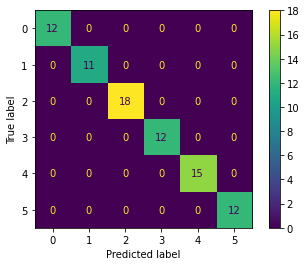

In [81]:
from sklearn import linear_model
from sklearn import metrics

# Logistic Regression Implementation:
print("Training for", str(phase_num+1), "classes:")
lm = linear_model.LogisticRegression(multi_class='auto', solver='liblinear')
lm.fit(X_train, y_train) 

# Find the accuracy achieved on training set using logreg.score and y_train as type of int
acc_logreg = lm.score(X_train, y_train)
print("Accuracy on training data = %f" % acc_logreg)
# print("diff:", np.subtract(y_hat_logreg, y_train))

# eval
y_hat_logreg = lm.predict(X_test)
print("Metrics for Testing data")
print(metrics.classification_report(y_test, y_hat_logreg))
print("Confusion Matrix for *Testing Data")
cnf_matrix = metrics.confusion_matrix(y_hat_logreg, y_test)
metrics.ConfusionMatrixDisplay(cnf_matrix).plot()
# print("Coefficients:", lm.coef_)

Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data


/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


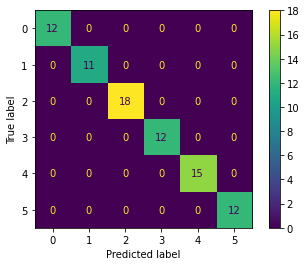

In [83]:
from sklearn import svm

# SVM Implementation
clf = svm.SVC(decision_function_shape='ovo', kernel='rbf')  # 'linear' poly' 'rbf'
clf.fit(X_train, y_train)
# SVC(decision_function_shape='ovo')

# eval
y_hat_svm = clf.predict(X_test)  # X_train
print("Metrics for Testing data")
print(metrics.classification_report(y_test, y_hat_svm))
print("Confusion Matrix for *Testing Data")
cnf_matrix = metrics.confusion_matrix(y_hat_svm, y_test)
metrics.ConfusionMatrixDisplay(cnf_matrix).plot()


Training with Activation: relu , NN Structure: [63, 36, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: relu , NN Structure: [63, 18, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: relu , NN Structure: [63, 18, 9, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0   

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training with Activation: relu , NN Structure: [63, 36, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: relu , NN Structure: [63, 42, 27, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training with Activation: tanh , NN Structure: [63, 36, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: tanh , NN Structure: [63, 18, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: tanh , NN Structure: [63, 18, 9, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0   

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training with Activation: tanh , NN Structure: [63, 36, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: tanh , NN Structure: [63, 42, 27, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: logistic , NN Structure: [63, 18, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0  

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training with Activation: logistic , NN Structure: [63, 18, 9, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data

Training with Activation: logistic , NN Structure: [63, 9, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6],

/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training with Activation: logistic , NN Structure: [63, 42, 27, 6]
[[63, 36, 6], [63, 18, 6], [63, 31, 18, 6], [63, 18, 9, 6], [63, 9, 6], [63, 36, 6], [63, 42, 27, 6]] Neural Network: alpha = 0.25 , regularized_lambda = 0.006 for 6 categories

Prediction accuracy is 100.0%
Metrics for Testing data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        18
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        12

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix for *Testing Data


/Users/korahughes/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


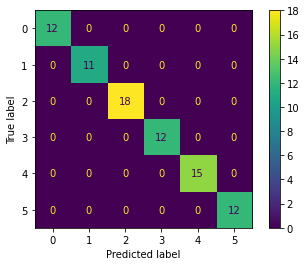

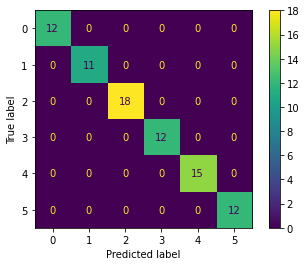

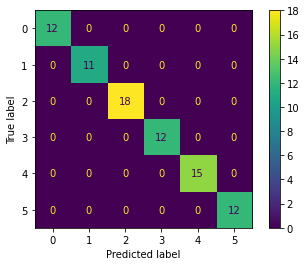

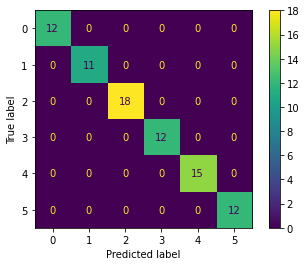

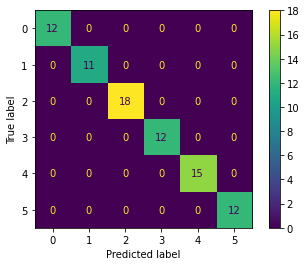

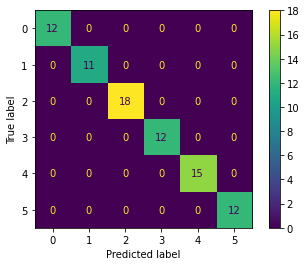

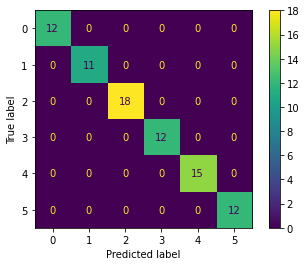

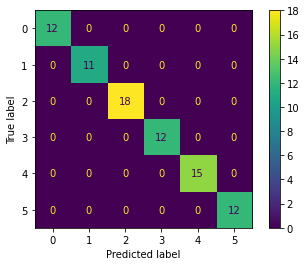

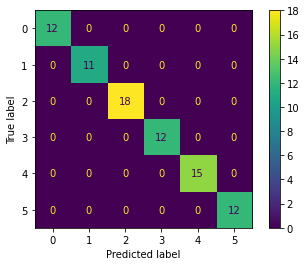

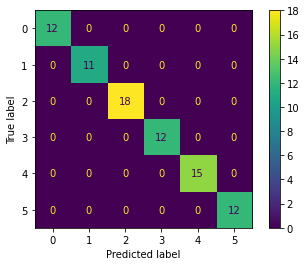

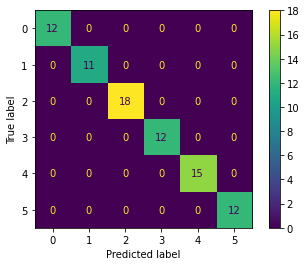

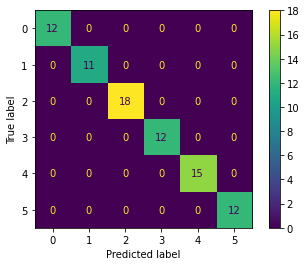

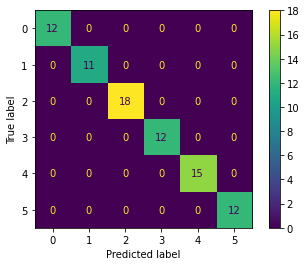

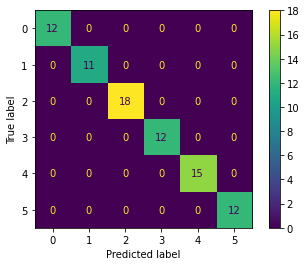

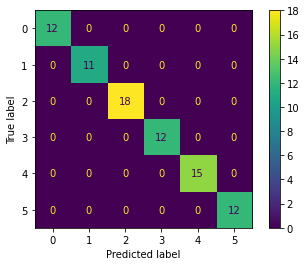

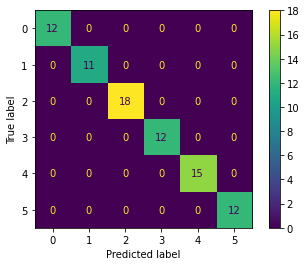

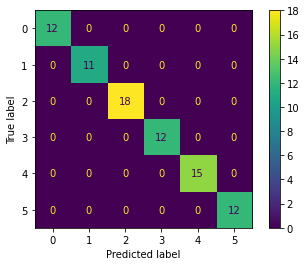

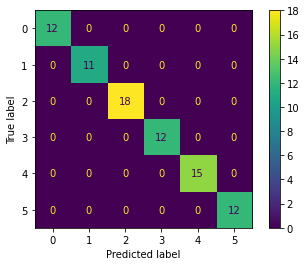

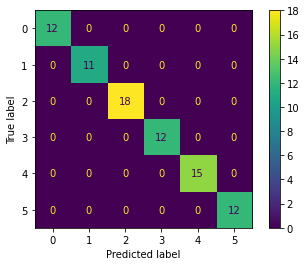

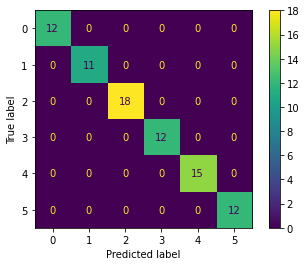

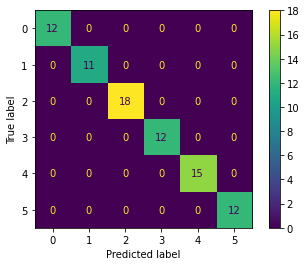

In [84]:
from sklearn.neural_network import MLPClassifier

# Neural Network Implementation
middle_layer = 5*3 + 3  # hand digits xyz + wrist orientation
nn_structures = [[X_train.shape[1], int(middle_layer*2), phase_num+1],
                [X_train.shape[1], middle_layer, phase_num+1],
                [X_train.shape[1], X_train.shape[1]//2, middle_layer, phase_num+1],
                [X_train.shape[1], middle_layer, middle_layer//2, phase_num+1],
                [X_train.shape[1], middle_layer//2, phase_num+1],
                [X_train.shape[1], int(middle_layer*2), phase_num+1],
                [X_train.shape[1], int(X_train.shape[1]//1.5), int(middle_layer*1.5), phase_num+1]]

# train the NN
n_iters = 2500
alpha = 0.25
add_reg = 0.006  # lambda for the regularization term

for act in ['relu', 'tanh', 'logistic']:
    for i in range(len(nn_structures)):
        print("\nTraining with Activation:", act, ", NN Structure:", nn_structure[i])
        print(nn_structure, "Neural Network: alpha =", alpha, ", regularized_lambda =", add_reg, "for", str(phase_num+1), "categories")
        clf = MLPClassifier(solver='lbfgs', activation=act, alpha=1e-5, hidden_layer_sizes=nn_structure[i][1:-1])
        clf.fit(X, y)

        # Assessing accuracy
        y_hat_nn = clf.predict(X_test)  # X_train
        print('\nPrediction accuracy is {}%'.format(accuracy_score(y_test, y_hat_nn) * 100))

        print("Metrics for Testing data")
        print(metrics.classification_report(y_test, y_hat_nn))
        print("Confusion Matrix for *Testing Data")
        cnf_matrix = metrics.confusion_matrix(y_hat_nn, y_test)
        metrics.ConfusionMatrixDisplay(cnf_matrix).plot()